## Ensemble Lab

Using the same approach in class, splitting into a testing and traing set and evaluating using RMSE, please answer the following questions:

1. After how many bagged samples does the Decision Tree stop improving on the car data?
2. Fit a linear model using sklearn's LinearRegression and measure the performance. Then perform bagging and see how the performance changes
3. Compare the performance of the decision tree and linear regression by itself, and compare the 
performance by combining these two

Note: When you break up the data into training and testing use test_size = .9

train_test_split(data, test_size=.9)

#### How does performance of the DT change as you change the number of bagged samples?

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
data = pd.read_csv('/Users/joelwitten/Downloads/vehicles.csv')
columns = ['highway08', 'displ', 'sCharger', 'tCharger','year', 'cylinders']
data = data[columns]

In [7]:
data = data[~pd.isnull(data.displ)]
data['sCharger'] = data.sCharger.map({None: 0, 'S':1})
data['tCharger'] = data.tCharger.map({None: 0, 'T':1})
data = data.dropna()

In [49]:
train, test = train_test_split(data, test_size=.9)

In [50]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]


In [52]:
clf_normal = DecisionTreeRegressor(max_depth=3 )
clf_normal.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best')

In [54]:
results = []
for k in range(1,50):
    bagreg = BaggingRegressor(DecisionTreeRegressor(),
                              n_estimators = k, 
                              bootstrap=True
                             )
    bagreg.fit(X_train, y_train)
    pred = bagreg.predict(X_test)
    results.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))

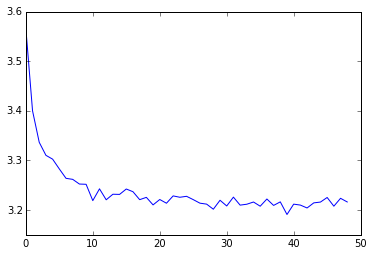

In [56]:
plt.plot(results_dt)

#### How does bagging help improve the performance of a linear model on the fuel data?

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
pred = clf.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, pred))

3.7887605820240267

In [60]:
results_lm = []
for k in range(1,50):
    bagreg = BaggingRegressor(LinearRegression(),
                              n_estimators = k, 
                              bootstrap=True
                             )
    bagreg.fit(X_train, y_train)
    pred = bagreg.predict(X_test)
    results_lm.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))

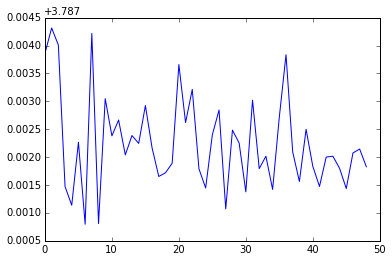

In [61]:
plt.plot(results_lm)

#### How does performance change if you average results of your LM and Decision Tree?

In [64]:
clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)
clf_lm = LinearRegression()
clf_lm.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)
pred_lm = clf_lm.predict(X_test)
pred_avg = (pred_dt + pred_lm)/2.0

print (np.sqrt(metrics.mean_squared_error(y_test, pred_dt)),
       np.sqrt(metrics.mean_squared_error(y_test, pred_lm)),      
       np.sqrt(metrics.mean_squared_error(y_test, pred_avg)))


(3.3923372589157421, 3.7887605820240267, 3.2125707308626321)


#### Why do you think Linear Regression wasn't affected by bootstrapping?

###### Potential answer: No advantage to having duplicate rows in a linear regression problem